# **KNN - Pure Python:**

**Understanding K Nearest Neighbors KNN:**

K-Nearest Neighbors (KNN) is a simple, supervised machine learning algorithm used for classification. In KNN, data points are classified by a majority vote of their neighbors. The algorithm calculates the distance between points and assigns a class based on the most common class among the 'k' nearest neighbors.

In [2]:
# Import necessary libraries for data manipulation, visualization, and KNN functionality:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [3]:
colors = ['red','green','blue']
cmap=ListedColormap(colors)

In [4]:
iris = datasets.load_iris()
X,Y=iris.data,iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=1234)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


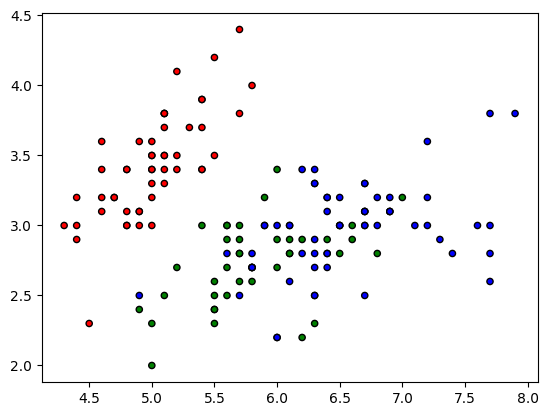

In [5]:
plt.figure()
plt.scatter(X[:,0],X[:,1],s=20,c=Y,cmap=cmap,edgecolors='k')
plt.show()

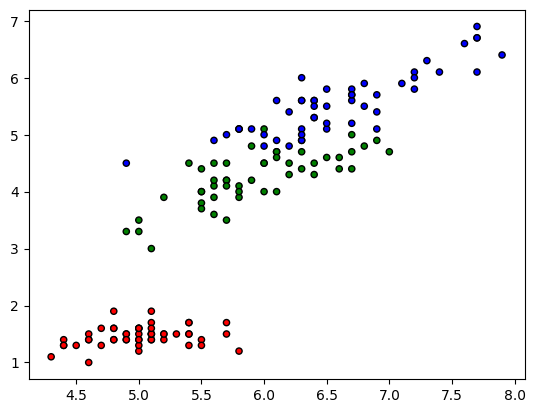

In [6]:
plt.figure()
plt.scatter(X[:,0],X[:,2],s=20,c=Y,cmap=cmap,edgecolors='k')
plt.show()

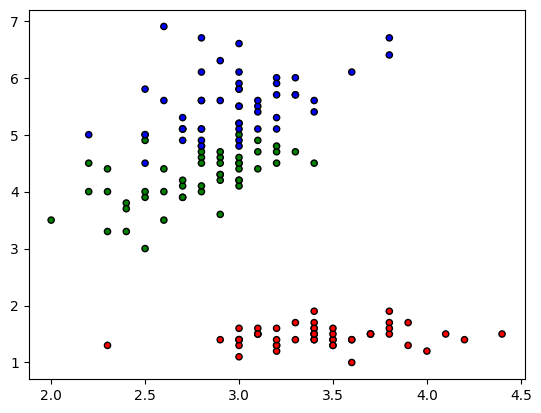

In [7]:
plt.figure()
plt.scatter(X[:,1],X[:,2],s=20,c=Y,cmap=cmap,edgecolors='k')
plt.show()

In [14]:
def euclidean_distance(x1,x2):
  # This function calculates the Euclidean distance between two points.
  return(np.sqrt(np.sum((x1 - x2)**2)))

class KNN:
  def __init__(self,k=5):
    self.k = k

  def fit(self, X,Y):
    self.X_train = X
    self.Y_train = Y

  def predict(self,X):
    predicted_labels=[self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self,x):
    # compute distances
    distances =[euclidean_distance(x, x_train) for x_train in self.X_train]
    # get k nearest samples(neighbors), labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.Y_train[i] for i in k_indices]
    # choose common class (majority vote) in these k nearest samples
    majority_vote = Counter(k_nearest_labels).most_common(self.k)
    return majority_vote[0][0]

In [19]:
clf = KNN(k=5)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

In [20]:
#Evaluation:
accuracy = np.sum(predictions == Y_test)/ len(Y_test)
print(accuracy)

0.9666666666666667
